#KERAS PROJECT -> 3

#CANCER PREDICTION PROJECT

#IMPORTS

In [4]:
#Import Numpy And Pandas
import numpy as np
import pandas as pd

In [6]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#THE DATA

In [9]:
#Read data in df
df = pd.read_csv('cancer_classification.csv')

In [11]:
#Head of df
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
#Info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
#Describe on df
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#EXPLORATORY DATA ANALYSIS

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

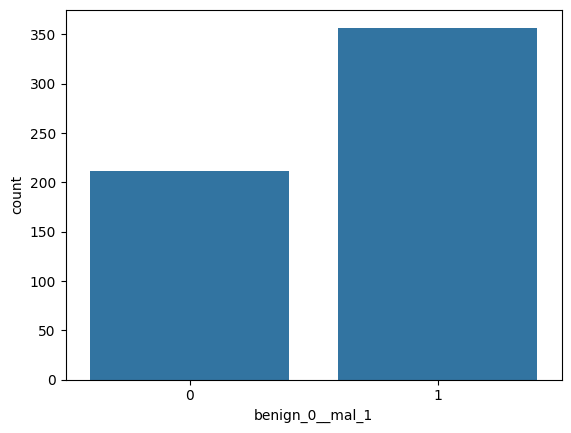

In [20]:
#Count benign and malignant
sns.countplot(data=df,x='benign_0__mal_1')

In [24]:
#Correlation of other features with benign_0__mal_1
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

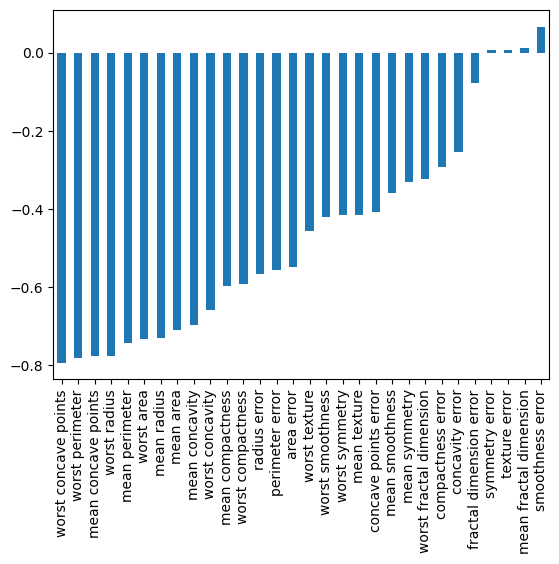

In [32]:
#Bar plot of correlation of features with benign_0__mal_1
df.corr()['benign_0__mal_1'].sort_values().drop('benign_0__mal_1').plot(kind='bar')

<Axes: >

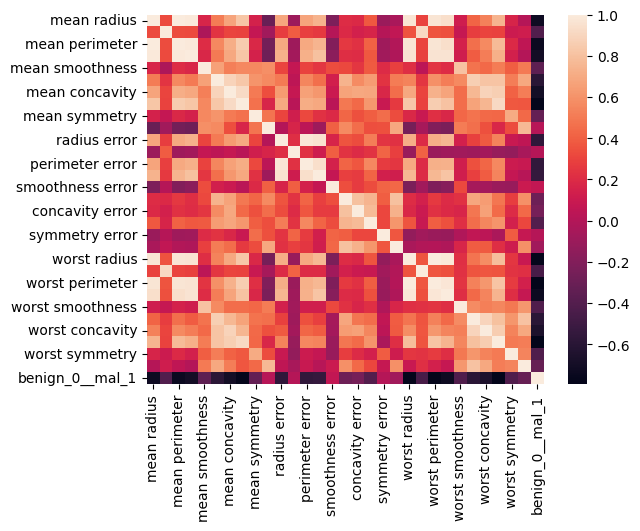

In [34]:
#Heatmap of df
sns.heatmap(df.corr())

#TRAIN TEST SPLIT

In [37]:
#Import train_test_split
from sklearn.model_selection import train_test_split

In [57]:
#Perform train test split
x_train,x_test,y_train,y_test = train_test_split(df.drop('benign_0__mal_1',axis=1).values,df['benign_0__mal_1'].values, test_size=0.33, random_state=42)

In [59]:
x_train

array([[1.546e+01, 1.189e+01, 1.025e+02, ..., 1.827e-01, 3.216e-01,
        1.010e-01],
       [1.285e+01, 2.137e+01, 8.263e+01, ..., 5.601e-02, 2.488e-01,
        8.151e-02],
       [1.921e+01, 1.857e+01, 1.255e+02, ..., 2.091e-01, 3.537e-01,
        8.294e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [61]:
x_test

array([[1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
        8.750e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, ..., 1.789e-01, 2.551e-01,
        6.589e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
        8.019e-02],
       ...,
       [1.371e+01, 2.083e+01, 9.020e+01, ..., 1.556e-01, 3.196e-01,
        1.151e-01],
       [1.447e+01, 2.499e+01, 9.581e+01, ..., 1.205e-01, 3.187e-01,
        1.023e-01],
       [1.354e+01, 1.436e+01, 8.746e+01, ..., 1.288e-01, 2.977e-01,
        7.259e-02]])

In [63]:
y_train

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [65]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

#SCALING DATA

In [70]:
#Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [72]:
#Create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [74]:
#Fit Scaler on x_train to avoid data leakage
scaler.fit(x_train)

MinMaxScaler()

In [76]:
#Transform data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#CREATING THE MODEL

In [79]:
#Import Sequential Model
from tensorflow.keras.models import Sequential

In [81]:
#Import Dense and dropout layer
from tensorflow.keras.layers import Dense,Dropout

In [85]:
#Create Model
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

#TRAINING MODEL

#CASE 1: Choosing too many epochs and overfitting

In [89]:
#Fit Model
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=600)

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.6448 - val_loss: 0.6053
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5912 - val_loss: 0.5535
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5456 - val_loss: 0.5057
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5017 - val_loss: 0.4604
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4563 - val_loss: 0.4145
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4103 - val_loss: 0.3774
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3595 - val_loss: 0.3411
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3207 - val_loss: 0.3123
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2919 - val_loss: 0.2875
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2528 - val_loss: 0.2688
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2455 - val_loss: 0.2509
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [91]:
#Make a dataframe of val_loss and loss
loss_df = pd.DataFrame()
loss_df['LOSS']=model.history.history['loss']
loss_df['VALIDATION LOSS']=model.history.history['val_loss']
loss_df.head()

,LOSS,VALIDATION LOSS
0,0.636498,0.605328
1,0.581951,0.553544
2,0.532471,0.505653
3,0.485435,0.460415
4,0.439514,0.414496


<Axes: >

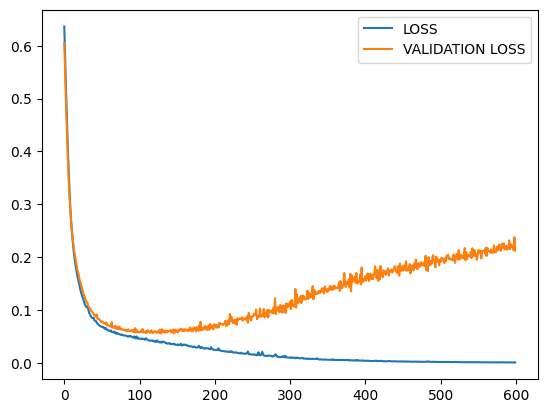

In [93]:
#Plot loss and val_loss
loss_df.plot()

Conclusion -> At start,both loss and val_loss decrease, but after then loss is decreasing but val_loss is increasing because of overfitting.

#Case 2: Early Stopping

In [106]:
#Recreate Model
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [108]:
#Import Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
#Create early stopping instance
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [112]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=600,verbose=1,callbacks=early_stop)

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.6868 - val_loss: 0.6687
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.6587 - val_loss: 0.6370
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6324 - val_loss: 0.6046
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5916 - val_loss: 0.5713
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5559 - val_loss: 0.5351
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5299 - val_loss: 0.4924
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4773 - val_loss: 0.4523
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4426 - val_loss: 0.4166
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4001 - val_loss: 0.3786
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3634 - val_loss: 0.3472
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.3259 - val_loss: 0.3263
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

In [114]:
#Make a df of loss and val_loss again
loss_df = pd.DataFrame(model.history.history)

<Axes: >

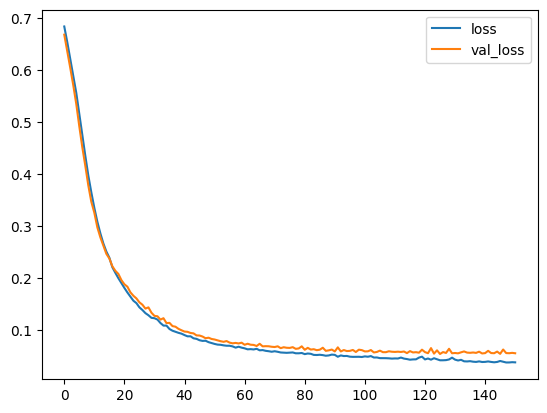

In [116]:
#Plot loss and val_loss
loss_df.plot()

Conclusion -> As soon as our val_loss stops to decrease,our model will stop fitting.

#Case 3: Adding in DropOut Layers

In [120]:
#Recreate model with dropout layers
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [124]:
#Fitting model again
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.7104 - val_loss: 0.6793
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6718 - val_loss: 0.6624
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6633 - val_loss: 0.6454
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6648 - val_loss: 0.6291
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6426 - val_loss: 0.6113
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6305 - val_loss: 0.5913
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6102 - val_loss: 0.5677
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6026 - val_loss: 0.5436
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5797 - val_loss: 0.5150
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5604 - val_loss: 0.4846
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5390 - val_loss: 0.4588
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

<Axes: >

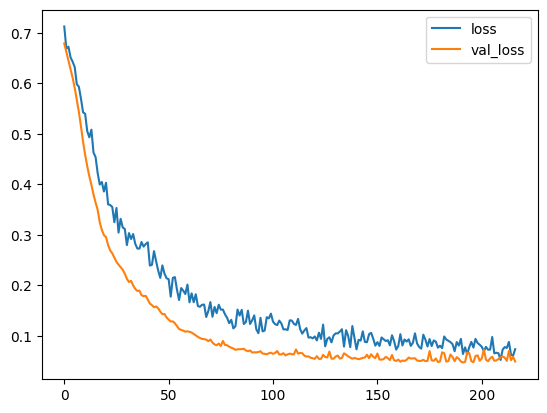

In [130]:
pd.DataFrame(model.history.history).plot()

#Conclusion -> As we see our loss and val_loss starts to merge which is a perfect thing for our model

#MODEL EVALUATION 

In [134]:
#Take predictions
predictions = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [138]:
#Convert predictions to 0,1
predictions = (predictions>0.5).astype('int32')
predictions

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [140]:
#Import classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [142]:
#Claclassification Report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [144]:
#Confusion Matrix
print(confusion_matrix(y_test,predictions))

[[ 66   1]
 [  2 119]]


#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL